In [1]:
import requests 
import json
import pandas as pd
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns
import time
import pickle
import csv

In [2]:
DATA_PATH = "../../data/"

In [3]:
path = DATA_PATH + "champion.csv"
reader = csv.reader(open(path))
head = next(reader)

 # 라인별 챔피언 dict 생성 line_dict = {key : champ_str}
 __0 : TOP__ / __1 : MID__ / __2 : JUNGLE__ / __3 : AD_CARRY__ / __4 : SUPPORT__

In [4]:
top_dict = {}
jungle_dict = {}
mid_dict = {}
carry_dict = {}
sup_dict = {}

for row in reader:
    print(row)
    key = int(row[2]); champ_str = row[1]; line = int(row[3])
    if line == 0: top_dict[key] = champ_str
    elif line == 1: jungle_dict[key] = champ_str
    elif line == 2: mid_dict[key] = champ_str
    elif line == 3: carry_dict[key] = champ_str
    elif line == 4: sup_dict[key] = champ_str

['0', 'Aatrox', '266', '0']
['1', 'Ahri', '103', '2']
['2', 'Akali', '84', '2']
['3', 'Alistar', '12', '4']
['4', 'Amumu', '32', '1']
['5', 'Anivia', '34', '2']
['6', 'Annie', '1', '4']
['7', 'Aphelios', '523', '3']
['8', 'Ashe', '22', '3']
['9', 'AurelionSol', '136', '2']
['10', 'Azir', '268', '2']
['11', 'Bard', '432', '4']
['12', 'Blitzcrank', '53', '4']
['13', 'Brand', '63', '4']
['14', 'Braum', '201', '4']
['15', 'Caitlyn', '51', '3']
['16', 'Camille', '164', '0']
['17', 'Cassiopeia', '69', '2']
['18', 'Chogath', '31', '0']
['19', 'Corki', '42', '2']
['20', 'Darius', '122', '0']
['21', 'Diana', '131', '2']
['22', 'DrMundo', '36', '0']
['23', 'Draven', '119', '3']
['24', 'Ekko', '245', '1']
['25', 'Elise', '60', '1']
['26', 'Evelynn', '28', '1']
['27', 'Ezreal', '81', '3']
['28', 'Fiddlesticks', '9', '1']
['29', 'Fiora', '114', '0']
['30', 'Fizz', '105', '2']
['31', 'Galio', '3', '2']
['32', 'Gangplank', '41', '0']
['33', 'Garen', '86', '0']
['34', 'Gnar', '150', '0']
['35', 'Graga

In [5]:
top_dict.values()

dict_values(['Aatrox', 'Camille', 'Chogath', 'Darius', 'DrMundo', 'Fiora', 'Gangplank', 'Garen', 'Gnar', 'Heimerdinger', 'Illaoi', 'Irelia', 'Jax', 'Jayce', 'Kayle', 'Kennen', 'Kled', 'Malphite', 'MonkeyKing', 'Mordekaiser', 'Nasus', 'Ornn', 'Poppy', 'Quinn', 'Renekton', 'Rengar', 'Riven', 'Rumble', 'Ryze', 'Sett', 'Shen', 'Singed', 'Sion', 'Skarner', 'Teemo', 'Tryndamere', 'Urgot', 'Vladimir', 'Volibear', 'Yorick'])

In [6]:
jungle_dict.values()

dict_values(['Amumu', 'Ekko', 'Elise', 'Evelynn', 'Fiddlesticks', 'Gragas', 'Graves', 'Hecarim', 'Ivern', 'JarvanIV', 'Karthus', 'Kayn', 'Khazix', 'Kindred', 'LeeSin', 'Lillia', 'MasterYi', 'Nidalee', 'Nocturne', 'Nunu', 'Olaf', 'Rammus', 'RekSai', 'Sejuani', 'Shaco', 'Shyvana', 'Taliyah', 'Trundle', 'Udyr', 'Vi', 'Warwick', 'XinZhao', 'Zac'])

In [7]:
carry_dict.items()

dict_items([(523, 'Aphelios'), (22, 'Ashe'), (51, 'Caitlyn'), (119, 'Draven'), (81, 'Ezreal'), (202, 'Jhin'), (222, 'Jinx'), (145, 'Kaisa'), (429, 'Kalista'), (96, 'KogMaw'), (236, 'Lucian'), (21, 'MissFortune'), (360, 'Samira'), (15, 'Sivir'), (18, 'Tristana'), (29, 'Twitch'), (110, 'Varus'), (67, 'Vayne'), (498, 'Xayah')])

# numberWinsChampion

In [8]:
with open(DATA_PATH + 'numberWinsChampion.pickle', 'rb') as fr:
    numberWinsChampion = pickle.load(fr)
numberWinsChampion = pd.DataFrame(numberWinsChampion)
numberWinsChampion.fillna(0, inplace=True)
numberWinsChampion.head()

,266,103,84,12,32,34,1,523,22,136,...,157,777,83,350,154,238,115,26,142,143
103,12.0,0.0,6.0,6.0,0.0,1.0,0.0,19.0,5.0,0.0,...,8.0,1.0,0.0,6.0,7.0,9.0,2.0,4.0,18.0,0.0
84,24.0,10.0,0.0,51.0,1.0,2.0,2.0,66.0,74.0,6.0,...,40.0,44.0,2.0,17.0,13.0,19.0,4.0,4.0,52.0,1.0
12,24.0,16.0,36.0,0.0,0.0,3.0,2.0,47.0,41.0,2.0,...,14.0,14.0,0.0,17.0,6.0,14.0,1.0,8.0,38.0,4.0
32,0.0,0.0,1.0,1.0,0.0,0.0,0.0,6.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0
34,3.0,5.0,4.0,2.0,0.0,0.0,0.0,7.0,5.0,0.0,...,3.0,3.0,0.0,1.0,1.0,2.0,1.0,1.0,2.0,0.0


In [9]:
top_df = pd.DataFrame({k :v for k, v in numberWinsChampion.items() 
                       if k in list(top_dict.keys())})
jungle_df = pd.DataFrame({k :v for k, v in numberWinsChampion.items() 
                          if k in list(jungle_dict.keys())})
mid_df = pd.DataFrame({k :v for k, v in numberWinsChampion.items() 
                       if k in list(mid_dict.keys())})
carry_df = pd.DataFrame({k :v for k, v in numberWinsChampion.items() 
                         if k in list(carry_dict.keys())})
sup_df = pd.DataFrame({k :v for k, v in numberWinsChampion.items() 
                       if k in list(sup_dict.keys())})

In [10]:
top_df.head()

,266,164,31,122,36,114,41,86,150,74,...,98,27,14,72,17,23,6,8,106,83
103,12.0,12.0,1.0,6.0,1.0,10.0,6.0,5.0,1.0,1.0,...,5.0,3.0,0.0,1.0,0.0,1.0,0.0,0.0,4.0,0.0
84,24.0,120.0,2.0,19.0,0.0,38.0,36.0,20.0,3.0,10.0,...,30.0,6.0,4.0,2.0,1.0,9.0,8.0,16.0,33.0,2.0
12,24.0,69.0,2.0,9.0,2.0,22.0,12.0,13.0,1.0,5.0,...,23.0,3.0,0.0,1.0,0.0,4.0,3.0,8.0,12.0,0.0
32,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
34,3.0,10.0,1.0,5.0,0.0,3.0,5.0,5.0,0.0,1.0,...,4.0,1.0,0.0,0.0,1.0,2.0,2.0,2.0,1.0,0.0


# Combinations

In [11]:
with open(DATA_PATH + 'numberWinsCombination.pickle', 'rb') as fr:
    numberWinsCombination = pickle.load(fr)
numberWinsCombination = pd.DataFrame(numberWinsCombination)
numberWinsCombination.fillna(0, inplace=True)
numberWinsCombination.head()

,266,103,84,12,32,34,1,523,22,136,...,157,777,83,350,154,238,115,26,142,143
103,16.0,0.0,11.0,10.0,0.0,0.0,0.0,22.0,11.0,0.0,...,5.0,0.0,0.0,14.0,6.0,1.0,2.0,5.0,0.0,1.0
84,23.0,11.0,0.0,62.0,1.0,2.0,2.0,81.0,102.0,1.0,...,27.0,19.0,0.0,24.0,14.0,19.0,3.0,8.0,30.0,3.0
12,36.0,10.0,62.0,0.0,3.0,4.0,1.0,73.0,60.0,6.0,...,83.0,31.0,0.0,0.0,14.0,22.0,2.0,5.0,63.0,0.0
32,1.0,0.0,1.0,3.0,0.0,0.0,0.0,1.0,3.0,0.0,...,0.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0
34,8.0,0.0,2.0,4.0,0.0,0.0,0.0,15.0,6.0,0.0,...,2.0,0.0,1.0,2.0,3.0,1.0,0.0,2.0,0.0,1.0


In [12]:
with open(DATA_PATH + 'numberLosesCombination.pickle', 'rb') as fr:
    numberLosesCombination = pickle.load(fr)
numberLosesCombination = pd.DataFrame(numberLosesCombination)
numberLosesCombination.fillna(0, inplace=True)
numberLosesCombination.head()

,266,103,84,12,32,34,1,523,22,136,...,157,777,83,350,154,238,115,26,142,143
103,18.0,0.0,6.0,7.0,0.0,0.0,0.0,16.0,9.0,0.0,...,5.0,2.0,0.0,16.0,5.0,0.0,0.0,4.0,0.0,1.0
84,27.0,6.0,0.0,52.0,1.0,1.0,3.0,93.0,111.0,4.0,...,18.0,23.0,2.0,27.0,21.0,24.0,3.0,6.0,35.0,10.0
12,24.0,7.0,52.0,0.0,0.0,5.0,3.0,93.0,57.0,4.0,...,55.0,33.0,1.0,0.0,5.0,16.0,6.0,5.0,41.0,1.0
32,4.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,...,2.0,0.0,0.0,3.0,1.0,1.0,1.0,2.0,0.0,0.0
34,7.0,0.0,1.0,5.0,0.0,0.0,0.0,14.0,8.0,1.0,...,1.0,0.0,0.0,2.0,3.0,1.0,0.0,1.0,0.0,0.0


In [13]:
def calc_total_match(line_df):
    for A in line_df:
        for B in line_df:
            total = numberWinsChampion[A][B] + numberWinsChampion[B][A]
            line_df[A][B] = total          

In [14]:
top_total = top_df.copy()
jungle_total = jungle_df.copy()
mid_total = mid_df.copy()
carry_total = carry_df.copy()
sup_total = sup_df.copy()
champ_total = numberWinsChampion.copy()

calc_total_match(top_total)
calc_total_match(jungle_total)
calc_total_match(carry_total)
calc_total_match(sup_total)
calc_total_match(champ_total)

champ_total.head()

,266,103,84,12,32,34,1,523,22,136,...,157,777,83,350,154,238,115,26,142,143
103,26.0,0.0,16.0,22.0,0.0,6.0,1.0,30.0,17.0,0.0,...,15.0,8.0,0.0,13.0,13.0,13.0,5.0,6.0,37.0,0.0
84,51.0,16.0,0.0,87.0,2.0,6.0,3.0,129.0,145.0,10.0,...,66.0,80.0,2.0,29.0,24.0,39.0,7.0,6.0,113.0,2.0
12,50.0,22.0,87.0,0.0,1.0,5.0,3.0,95.0,78.0,6.0,...,29.0,31.0,0.0,32.0,22.0,32.0,5.0,11.0,86.0,6.0
32,0.0,0.0,2.0,1.0,0.0,0.0,0.0,6.0,0.0,0.0,...,1.0,0.0,0.0,2.0,0.0,1.0,1.0,0.0,2.0,1.0
34,6.0,6.0,6.0,5.0,0.0,0.0,0.0,18.0,7.0,0.0,...,8.0,4.0,0.0,4.0,4.0,3.0,1.0,2.0,9.0,0.0


In [15]:
# champ_nums = 152 
# games = []  # 평균 판수를 구하기 위한 리스트
# for i in champ_total:
#     games.append(round(sum(champ_total[i]) / (champ_nums - 1), 2)) # 자신 vs 151개의 챔프에 대하여
# len(games)

In [16]:
# game_mean = sum(games) / champ_nums

# 게임수의 평균은 32게임??
## 은 중복값 제거전..

In [17]:
# game_mean

In [18]:
# 판수 = []
# for i in champ_total:
#     for j in champ_total[i].index:
#         판수.append(champ_total[i][j])
# 총판수 = len(판수) - 152 # 미러전 뺀다

In [19]:
# round(game_mean, 2) == round(sum(판수) / 총판수, 2)

In [20]:
# 판수

In [21]:
s=0
for i in range(152):
    s += i
print(s)

11476


# 중복제거후 평균, 표준편차 구하기... => champ_total 에 대하여


In [22]:
columns = [c for c in champ_total]
columns.sort()
columns
rows = columns.copy()

t_idx = []
for c in columns:
    for r in columns:
        if not c == r: t_idx.append([c,r])
        
#t_idx[:152]

In [23]:
for idx in t_idx:
    # A vs B 랑 B vs A 는 같은 값이니 중복값
    중복값 = [idx[1], idx[0]]
    if 중복값 in t_idx: t_idx.remove(중복값)


# 11476으로 제거 완료

In [24]:
len(t_idx) == s

True

In [25]:
total_games = []
for col, row in t_idx:
    total_games.append(champ_total[col][row])
len(total_games)
#print(total_games)

11476

# 평균값과 표준편차를 쉽게 구하기 위해서 pd.Series
# 데이터의 50%는 11경기 이하이다.
## 같은라인 vs 같은라인, 같은라인 vs 다른라인 / 반으로 봤을때 적당한 값인듯?

In [26]:
total_games = pd.Series(total_games)
total_games.describe()

count    11476.000000
mean        32.410683
std         58.897103
min          0.000000
25%          3.000000
50%         11.000000
75%         34.000000
max        743.000000
dtype: float64

In [27]:
champ_total_mean = 32.41
champ_total_std = 58.89
champ_total_25 = 3
champ_total_50 = 11
champ_total_75 = 34
champ_total_max = 743
champ_total_min = 0

# 각 라인별 데이터 프레임에 대해서 진행

## 라인별 인덱스 뽑아내기 ( 중복값 없이 describe 진행을 위해서)

In [28]:
def 라인index추출(line_total):
    columns = [c for c in line_total]
    columns.sort()
    columns
    rows = columns.copy()

    t_idx = []
    for c in columns:
        for r in columns:
            if not c == r: t_idx.append([c,r])
    
    for idx in t_idx:
        # A vs B 랑 B vs A 는 같은 값이니 중복값
        중복값 = [idx[1], idx[0]]
        if 중복값 in t_idx: t_idx.remove(중복값)
    
    return t_idx

In [29]:
top_idx = 라인index추출(top_total)
jungle_idx = 라인index추출(jungle_total)
mid_idx = 라인index추출(mid_total)
carry_idx = 라인index추출(carry_total)
sup_idx = 라인index추출(sup_total)

# 라인별 경기 횟수 Series로 뽑아내기

In [30]:
def 라인별_경기(line_idx):
    line_games = []
    for col, row in line_idx:
        line_games.append(champ_total[col][row])
    return pd.Series(line_games)

In [31]:
top_games = 라인별_경기(top_idx)
jungle_games = 라인별_경기(jungle_idx)
mid_games = 라인별_경기(mid_idx)
carry_games = 라인별_경기(carry_idx)
sup_games = 라인별_경기(sup_idx)

## Top

In [59]:
top_numerical = dict(top_games.describe())
top_numerical

{'count': 780.0,
 'mean': 22.116666666666667,
 'std': 43.69271247774412,
 'min': 0.0,
 '25%': 2.0,
 '50%': 7.0,
 '75%': 23.0,
 'max': 476.0}

# Jungle

In [58]:
jungle_numerical = dict(jungle_games.describe())
jungle_numerical

{'count': 528.0,
 'mean': 31.62878787878788,
 'std': 68.11338412954692,
 'min': 0.0,
 '25%': 2.0,
 '50%': 8.0,
 '75%': 30.0,
 'max': 528.0}

## Mid

In [57]:
mid_numerical = dict(mid_games.describe())
mid_numerical

{'count': 406.0,
 'mean': 22.2192118226601,
 'std': 35.70432384327759,
 'min': 0.0,
 '25%': 2.0,
 '50%': 9.0,
 '75%': 27.75,
 'max': 311.0}

## Carry

In [70]:
carry_numerical = dict(carry_games.describe())
carry_numerical

{'count': 171.0,
 'mean': 83.23976608187135,
 'std': 133.7642168274998,
 'min': 0.0,
 '25%': 8.5,
 '50%': 29.0,
 '75%': 77.5,
 'max': 735.0}

## Sup

In [71]:
sup_numerical = dict(sup_games.describe())
sup_numerical

{'count': 465.0,
 'mean': 37.56989247311828,
 'std': 55.139712410264615,
 'min': 0.0,
 '25%': 4.0,
 '50%': 15.0,
 '75%': 48.0,
 'max': 352.0}

# 비율 비교하기
# 챔피언 숫자
# 챔프별 경기수

In [42]:
# 탑_챔피언수 = len(top_dict)
# 정글_챔피언수 = len(jungle_dict)
# 미드_챔피언수 = len(mid_dict)
# 원딜_챔피언수 = len(carry_dict)
# 서폿_챔피언수 = len(sup_dict)

# group_names = ['TOP', 'JG', 'MID', 'AD', 'SUP']
# group_size = [탑_챔피언수, 정글_챔피언수, 미드_챔피언수, 원딜_챔피언수, 서폿_챔피언수]
# plt.pie(group_size, 
#         labels=group_names,
#         autopct='%1.2f%%',
#         shadow=True)
# plt.title('Champion ratio by line', fontsize=20)
# plt.show()

In [43]:
# group_names = ['TOP', 'JG', 'MID', 'AD', 'SUP']
# group_size = [top_total_counts, jungle_total_counts, mid_total_counts, carry_total_counts, sup_total_counts]
# plt.pie(group_size, 
#         labels=group_names,
#         autopct='%1.2f%%',
#         shadow=True)
# plt.title('Match ratio by line', fontsize=20)
# plt.show()

## Outlier
- IQR이란, Interquartile range의 약자로써 Q3 - Q1를 의미한다.

- Q3 - Q1: 사분위수의 상위 75% 지점의 값과 하위 25% 지점의 값 차이

-  Q1(25 퍼센타일), Q3(75 퍼센타일)
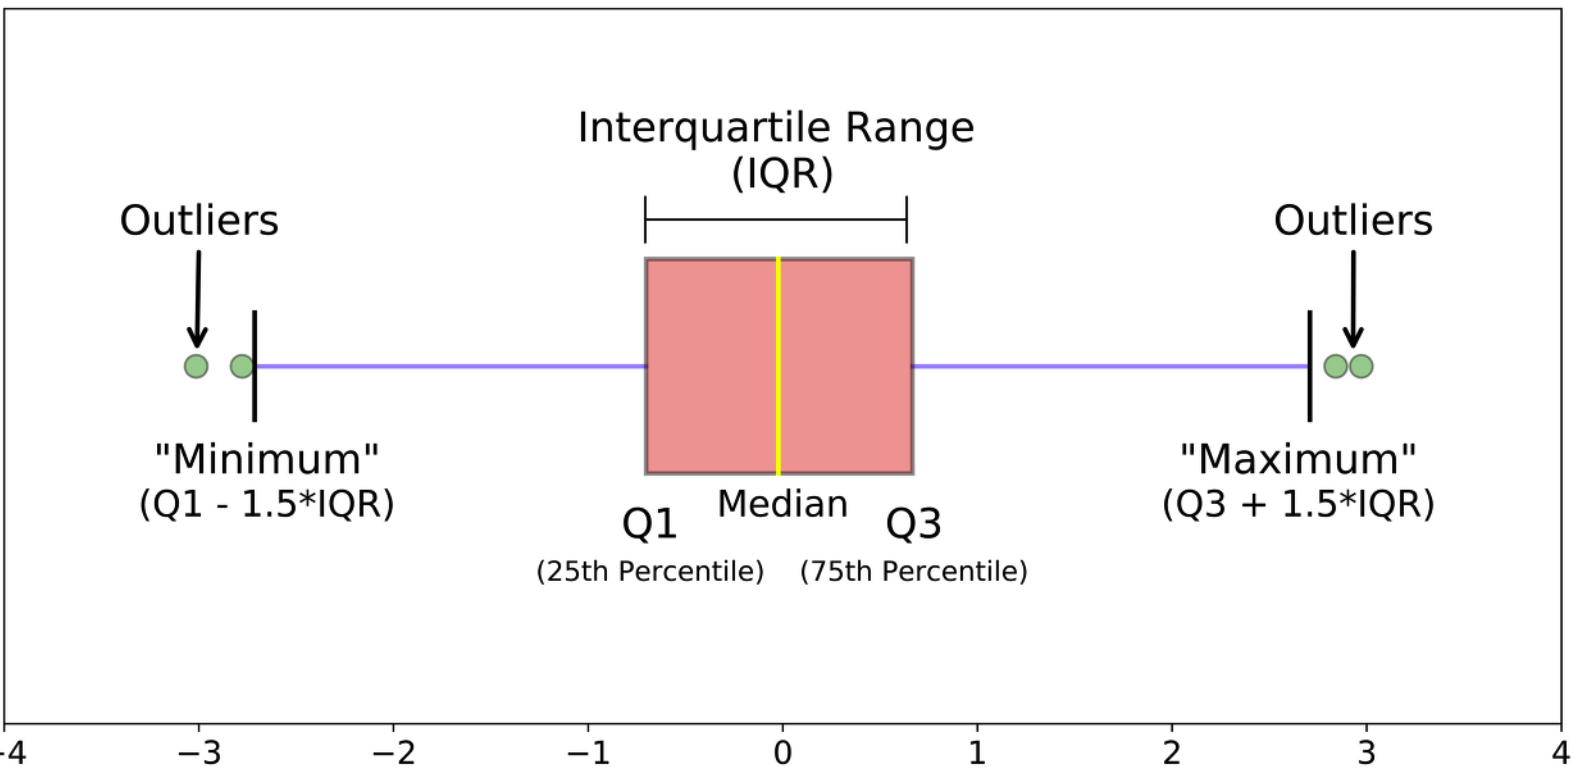

In [74]:
from collections import Counter 

def detect_outliers(line_df):
    if line_df == 'top': numerical = top_numerical # top_numerical
    elif line_df == 'jungle': numerical = jungle_numerical # jungle_numerical
    elif line_df == 'mid': numerical = mid_numerical # mid_numerical
    elif line_df == 'carry': numerical = carry_numerical # carry_numerical
    elif line_df == 'sup': numerical = sup_numerical # sup_numerical        
    
    outlier_indices = []
    Q1 = numerical["25%"] 
    Q3 = numerical["75%"] 
    IQR = Q3 - Q1 
    outlier_step = 1.5 * IQR
    
    minimum = Q1 - outlier_step
    maximum = Q3 + outlier_step
    
    return minimum, maximum

In [78]:
top_out_range = detect_outliers('top')
jungle_out_range =detect_outliers('jungle')
mid_out_range = detect_outliers('mid')
carry_out_range = detect_outliers('carry')
sup_out_range =detect_outliers('sup')

In [90]:
print('-------- Valid Range --------')
print(f'''{'top':<6} : {top_out_range[0]} ~ {top_out_range[1]}\n
{'jungle':<6} : {jungle_out_range[0]} ~ {jungle_out_range[1]}\n
{'mid':<6} : {mid_out_range[0]} ~ {mid_out_range[1]}\n
{'carry':<6} : {carry_out_range[0]} ~ {carry_out_range[1]}\n
{'sup':<6} : {sup_out_range[0]} ~ {sup_out_range[1]}''')

-------- Valid Range --------
top    : -29.5 ~ 54.5

jungle : -40.0 ~ 72.0

mid    : -36.625 ~ 66.375

carry  : -95.0 ~ 181.0

sup    : -62.0 ~ 114.0
